In [67]:
import numpy as np
from numpy import sin,cos,pi,exp,sqrt
import matplotlib.pyplot as plt

from scipy import integrate
from scipy.integrate import quad

import math
import cmath

##  QUESTION 1:

In [15]:
def f(x):
    if -np.pi<=x<=0:
        return 0
    elif 0<=x<=np.pi:
        return np.pi-x

In [21]:
li=-np.pi

lf=np.pi

n=5

In [8]:
def fourierseries(li, lf, n, f):
    l = (lf-li)/2 
    
    a0=1/l*integrate.quad(lambda x: f(x), li, lf)[0]
    
    A = np.zeros((n))
   
    B = np.zeros((n))
     
    for i in range(1,n+1):
        A[i-1]=1/(2*l)*integrate.quad(lambda x: f(x)*np.cos(i*np.pi*x/l), li, lf)[0]
        B[i-1]=1/(2*l)* integrate.quad(lambda x: f(x)*np.sin(i*np.pi*x/l), li, lf)[0]
 
    return [a0/2.0, A, B]

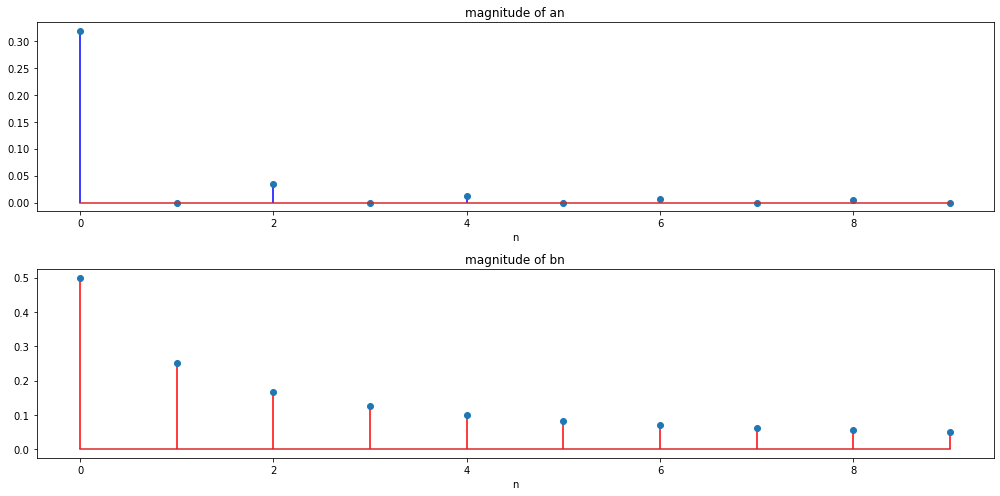

In [20]:
coeffs=fourierseries(li,lf,10,f)

plt.figure(figsize=(14,7))

ni=np.arange(0,10)

plt.subplot(2,1,1)
plt.stem(ni,abs(coeffs[1]),'b')
plt.title("magnitude of an")
plt.xlabel("n")

plt.subplot(2,1,2)
plt.stem(ni,abs(coeffs[2]),'r')
plt.title("magnitude of bn")
plt.xlabel("n")

plt.tight_layout()

## QUESTION 2:

### PART 1

In [30]:
T=2 #time perid of the function
w=2*np.pi/T 

def a(n): 
    f= lambda x:(1-2*abs(x))*np.cos(n*w*x) if (-1<=x<=1) else 0
    k= integrate.quad(f,-1, 1)
    return round(k[0],2)

def b(n): 
    f = lambda x:(1-2*abs(x))*np.sin(n*w*x) if (-1<=x<=1) else 0
    k= integrate.quad(f,-1, 1)
    return round(k[0],2)
n=np.arange(1,16,1)


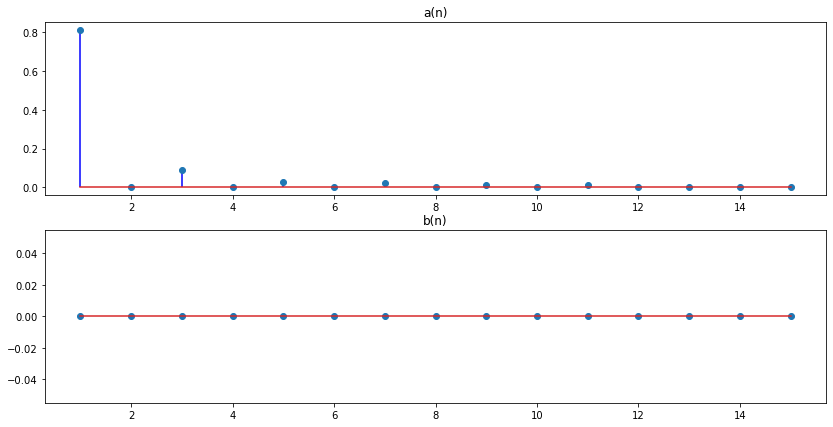

In [31]:
plt.figure(figsize=(14,7))

plt.subplot(2,1,1)
a_sa=[abs(a(i)) for i in n]
plt.title('a(n)')
plt.stem(n,a_sa,'b')

plt.subplot(2,1,2)
b_sa=np.abs([b(i) for i in n])
plt.title('b(n)')
plt.stem(n,b_sa,'r')

plt.show()

### PART 2:

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

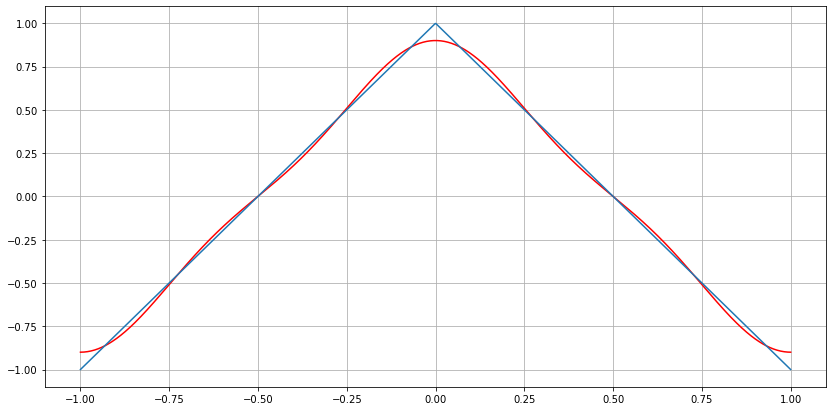

In [32]:
f=lambda x:(1-2*abs(x))

t=np.linspace(-1,1,1000)
y=np.zeros([len(t)])

for n in range(1,4):
    y=y+a(n)*np.cos(n*w*t)+b(n)*np.sin(n*w*t)

    plt.figure(figsize=(14,7))
plt.plot(t,y,'r')
F=[f(i) for i  in t]
plt.plot(t,F)
plt.grid()
    

### PART 3:

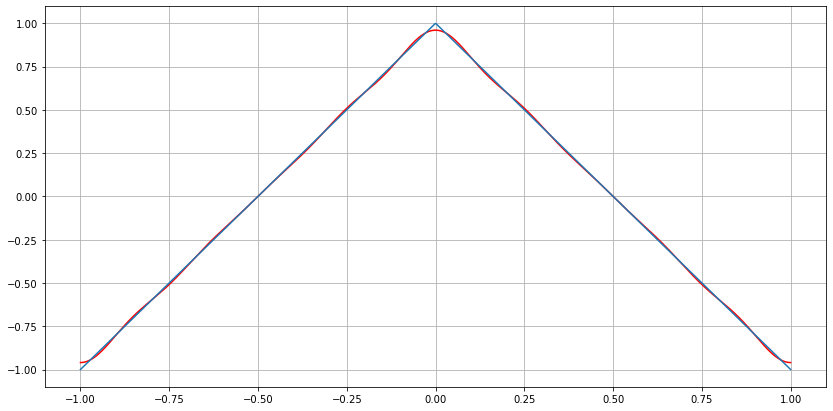

In [33]:
t=np.linspace(-1,1,1000)
y=np.zeros([len(t)])

for n in range(1,10):
    y=y+a(n)*np.cos(n*w*t)+b(n)*np.sin(n*w*t)
    
plt.figure(figsize=(14,7))
plt.plot(t,y,'r')
F=[f(i) for i  in t]
plt.plot(t,F)
plt.grid()

## QUESTION 3:

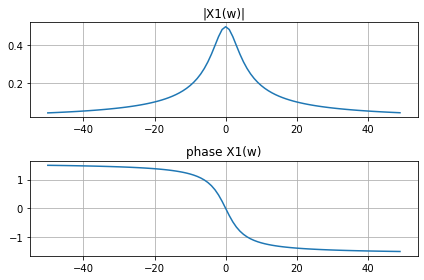

In [79]:
def x1(t,A,a):
    if(t>0):
        return A*np.exp(-a*t)
    else:
        return 0


X1_w_real = np.array([quad(lambda t,w : x1(t,2,4)*np.cos(w*t),-np.inf,np.inf,args=w)[0] for w in range(-50,50)])
X1_w_img = np.array([quad(lambda t,w : x1(t,2,4)*np.sin(w*t),-np.inf,np.inf,args=w)[0] for w in range(-50,50)])


X1_mag = np.sqrt(X1_w_real**2 + X1_w_img**2)
X1_phase = np.arctan(-X1_w_img/X1_w_real)

w = [i for i in range(-50,50)]

plt.subplot(2,1,1)
plt.plot(w,X1_mag)
plt.title("|X1(w)|")
plt.grid()

plt.subplot(2,1,2)
plt.plot(w,X1_phase)
plt.title("phase X1(w)")
plt.grid()

plt.tight_layout()

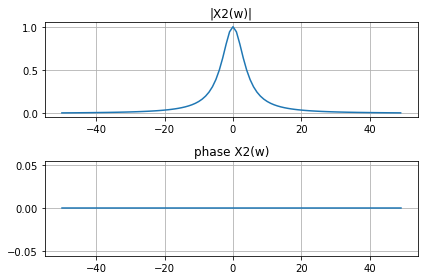

In [80]:
def x2(t,A,a):
    return A*np.exp(-a*abs(t))

X2_w_real = np.array([quad(lambda t : x2(t,2,4)*np.cos(w*t),-np.inf,np.inf)[0] for w in range(-50,50)])
X2_w_img = np.array([quad(lambda t : x2(t,2,4)*np.sin(w*t),-np.inf,np.inf)[0] for w in range(-50,50)])

X2_mag = np.sqrt(X2_w_real**2 + X2_w_img**2)
X2_phase = np.arctan(X2_w_img/X2_w_real)

plt.subplot(2,1,1)
plt.plot(w,X2_mag)
plt.title("|X2(w)|")
plt.grid()

plt.subplot(2,1,2)
plt.plot(w,X2_phase)
plt.title("phase X2(w)")
plt.grid()

plt.tight_layout()

## QUESTION 4:

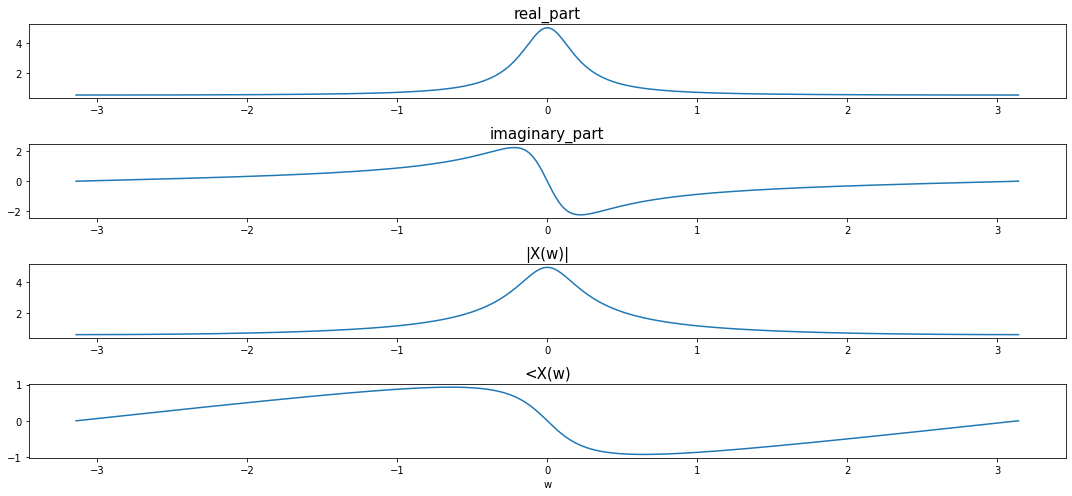

In [44]:
def X(a,w):
    return (1/(1-a*np.exp(-1j*w)))

w=np.linspace(-np.pi,np.pi,1000)

plt.figure(figsize=(15,7))

plt.subplot(4,1,1)
plt.plot(w,X(0.8,w).real)
plt.title('real_part',size=15)

plt.subplot(4,1,2)
plt.plot(w,X(0.8,w).imag)
plt.title('imaginary_part',size=15)

plt.subplot(4,1,3)
plt.plot(w,abs(X(0.8,w)))
plt.title('|X(w)|',size=15)

plt.subplot(4,1,4)
phase=[cmath.phase(k) for k in X(0.8,w)]
plt.plot(w,phase)
plt.title('<X(w)',size=15)

plt.xlabel('w')

plt.tight_layout()

plt.show()

##  QUESTION 5:

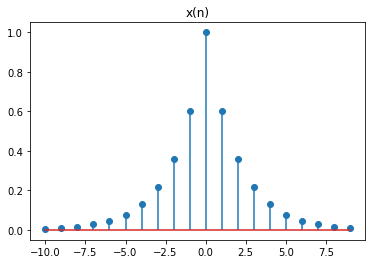

In [3]:
def x(n):
    return 0.6**abs(n)


n=np.arange(-10,10,1)

x=[x(i) for i in n]

plt.stem(n,x)
plt.title('x(n)')
plt.show()

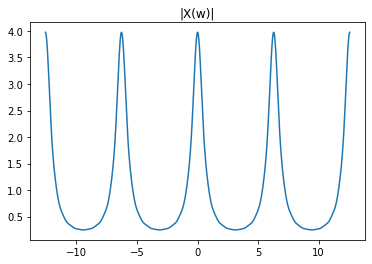

In [8]:
def xdf_real(w):
    k=np.dot((0.6**abs(n)),np.cos(n*w))
    return k

def xdf_img(w):
    k=np.dot((0.6**abs(n)),np.sin(n*w)*-1)
    return k

w=np.linspace(-4*np.pi,4*np.pi,1000)

X_real=[xdf_real(j) for j in w]
X_img=[xdf_img(j) for j in w]

x_mag=[np.sqrt(a**2+b**2) for a,b in zip(X_real,X_img)]

plt.plot(w,x_mag)
plt.title('|X(w)|')
plt.show()

## QUESTION 6:

### PART 1:

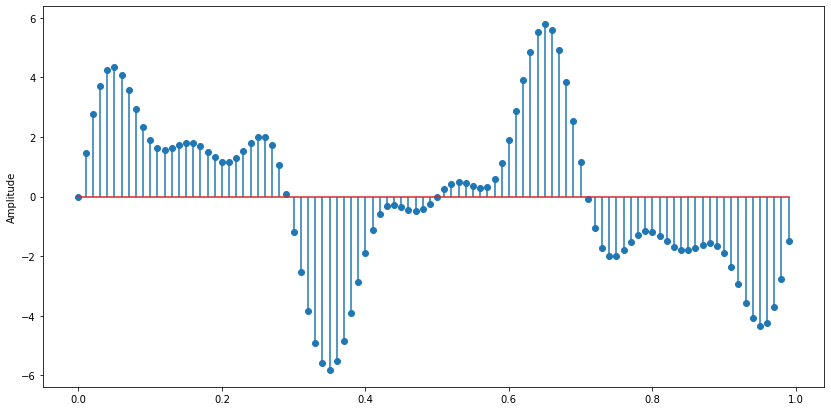

In [50]:
# sampling rate
fs=100
# sampling interval
ts=1.0/fs

t=np.arange(0,1,ts)

#frequency=2
x1=3*np.sin(2*np.pi*2*t)

#frequency=5
x2=2*np.sin(2*np.pi*5*t)

#frequency=8   
x3=np.sin(2*np.pi*8*t)

x=x1+x2+x3

plt.figure(figsize = (14, 7))
plt.stem(t, x)
plt.ylabel('Amplitude')


plt.show()

### PART 2:

In [52]:
def DFT(x):

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)#summation over 0 to N-1(x(n)*e^(-j*2*pi*k*n/N))
    
    return X

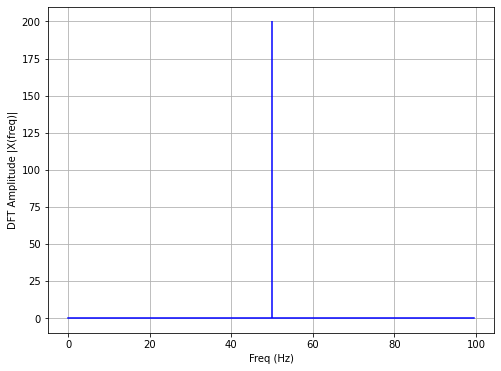

In [84]:
X = DFT(x)

# calculate the frequency
sr=100 #fs=100hz
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.grid()
plt.show()

### PART 3:

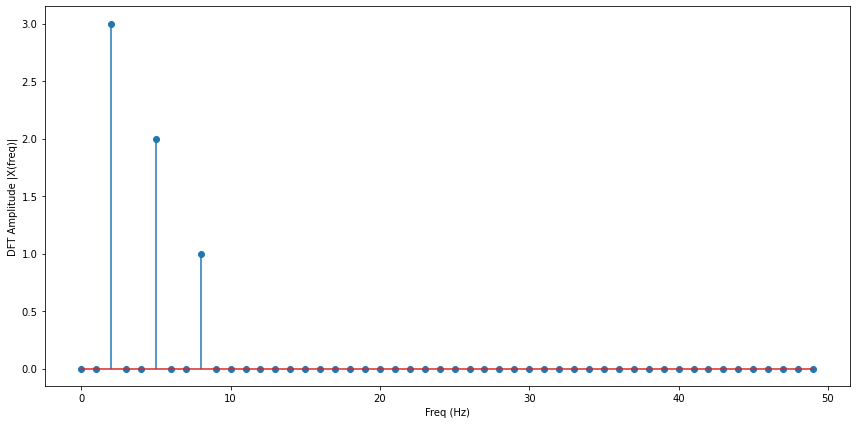

In [56]:
n_oneside = N//2
             # get the one side frequency
f_oneside = freq[:n_oneside]
             # normalize the amplitude
    
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))

plt.stem(f_oneside, abs(X_oneside))
plt.xlabel('Frequeny')
plt.ylabel('DFT Amplitude')

plt.tight_layout()
plt.show()

## QUESTION 7:

### PART 1:

Text(0, 0.5, 'Amplitude')

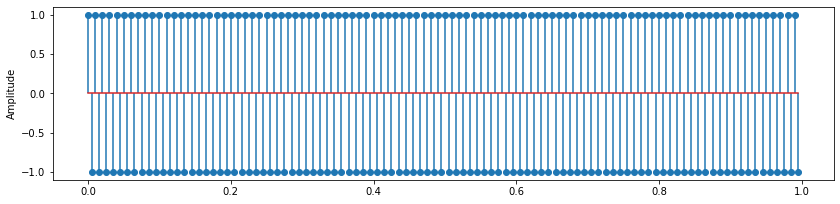

In [61]:
import math
# Generating a sinesoid signal with phase angle of pi/2
def sinfun(f,phase,t):
    sine = np.sin(2*math.pi*f*t+phase)
    return sine
f = 100
fs = 200
ts=1/fs 

t = np.arange(0,1,ts)
x= sinfun(f,np.pi/2,t)
plt.figure(figsize = (14, 7))
plt.subplot(2,1,1)
plt.stem(t,x)
plt.ylabel('Amplitude')




### PART 2:

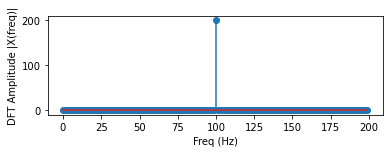

In [62]:
X=DFT(x)

# calculate the frequency
N=len(X)
n=np.arange(N)
T=N/fs
freq=n/T 
plt.subplot(2,1,2)
plt.stem(freq, abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()
plt.show()